In [200]:
import re 
import statistics as st
from unicodedata import normalize 
import nltk
from nltk.corpus import stopwords
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [423]:
with open("Data_Base_Words_Filter.txt", 'r') as raw_file:

  logs_text = raw_file.read()

#print(logs_text)
words_filter_list = re.sub("[\s]", " ",logs_text).split()
print(len(words_filter_list))

with open("Data_Base_Final_Words.txt", 'r') as raw_file:

  logs_text = raw_file.read()

#print(logs_text)
words_final_list = re.sub("[\s]", " ",logs_text).split()
print(len(words_final_list))

214183
32295


In [202]:
frequency_words = []
for word in words_final_list:
    count = words_filter_list.count(word)
    frequency_words.append(count)

In [203]:
order_list = frequency_words[:]
order_list.sort(reverse=True)
#print(frequency_words)


In [286]:
def bars_diagram(x_list,y_list,title = 'Diagrama de Barras',labelx='',labely='',stadistics=None,move=0,sizex=10,sizey=5):
    # create a dataset
    def addlabels(x,y):
        for i in range(len(x)):
            plt.text(i,y[i],y[i])
            
    plt.figure(figsize = (sizex,sizey))
    height = x_list
    bars = y_list
    x_pos = np.arange(len(bars))
    
    # Create bars
    plt.bar(x_pos, height, color=(0.2, 0.4, 0.6, 0.6))
    #graphic
    if stadistics != None:
        if len(stadistics)== 9:
            plt.axvline(stadistics[0]-move,color = 'b',label = 'Q1')
            plt.axvline(stadistics[1]-move,color = 'g',label = 'Q2')
            plt.axvline(stadistics[2]-move,color = 'y',label = 'Q3')
            plt.axvline(stadistics[3]-move,color = 'r',label = 'P99')
            plt.legend()
            


             # Create names on the x-axis
            plt.xticks(x_pos, bars)
            # Show graph
            plt.title(title)
            plt.xlabel(labelx)
            plt.ylabel(labely)
            addlabels(y_list, x_list)
            print('La mediana es: {}'.format(stadistics[4]))
            print('La moda es: {}'.format(stadistics[5]))
            print('La media es: {}'.format(stadistics[6]))
            print('La varianza es: {}'.format(stadistics[7]))
            print('La desviacion estandar es: {}'.format(stadistics[8]))
            return plt.show()
        
        else:
            'Parametros de estadistica malos'
    # Create names on the x-axis
    plt.xticks(x_pos, bars)
    # Show graph
    plt.title(title)
    plt.xlabel(labelx)
    plt.ylabel(labely)
    addlabels(y_list, x_list)
    return plt.show()

In [285]:
def calculate_stadistics(numbers_list):
    quartil_1 = np.percentile(numbers_list, 25)
    quartil_2 = np.percentile(numbers_list, 50)
    quartil_3 = np.percentile(numbers_list, 75)
    p99 = np.percentile(numbers_list, 99)-1
    median = np.median(numbers_list)
    mode = st.mode(numbers_list)
    mean = np.mean(numbers_list)
    variance = np.var(numbers_list)
    deviation = np.std(numbers_list)
    return[quartil_1,quartil_2,quartil_2,p99,median,mode,mean,variance,deviation]

In [409]:
def len_words(words_list,long = None):
    letters_in_a_word = []
    for word in words_list:
        cont = 0
        for letter in word:
            cont += 1
        letters_in_a_word.append(cont)
    words_long = [0 for i in range(max(letters_in_a_word)+1)]
    for num in letters_in_a_word:
        words_long[num] += 1
    words = []
    if long != None:
        for num in range(len(letters_in_a_word)):
            if letters_in_a_word[num] == long:
                words.append(words_list[num])
    else:
        words = ['0']
    return [words_long,words,letters_in_a_word]
#words_filter_long=len_words(words_filter_list,20)
#print(words_filter_long[1])
#def len_words_list(words_list,long)

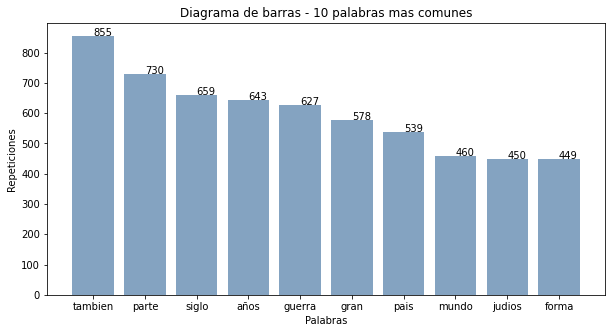

In [205]:
#Frequency words

frequency_word_list = []
most_repeated_words = []
for i in range(10):
    frequency_word_list.append(order_list[i])
    most_repeated_words.append(words_final_list[frequency_words.index(order_list[i])])

    
bars_diagram(most_repeated_words,frequency_word,'Diagrama de barras - 10 palabras mas comunes')

La mediana es: 7.0
La moda es: 7
La media es: 7.617537339564764
La varianza es: 5.9810199980629974
La desviacion estandar es: 2.4456123973481567


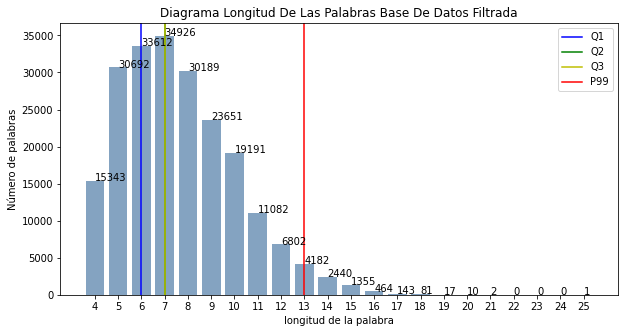

In [383]:
words_filter_long=len_words(words_filter_list,21)
xaxis= [str(i) for i in range(26)]
stadistics = calculate_stadistics(words_filter_long[2])
bars_diagram(words_filter_long[0][4:],xaxis[4:],'Diagrama Longitud De Las Palabras Base De Datos Filtrada',
             'longitud de la palabra','Número de palabras',stadistics,4)


['entscheidungsproblem', 'neoinstitucionalismo', 'desconcentralizacion', 'internacionalizacion', 'extraterritorialidad']
La mediana es: 8.0
La moda es: 8
La media es: 8.514940393249729
La varianza es: 6.75709989968283
La desviacion estandar es: 2.5994422285718968


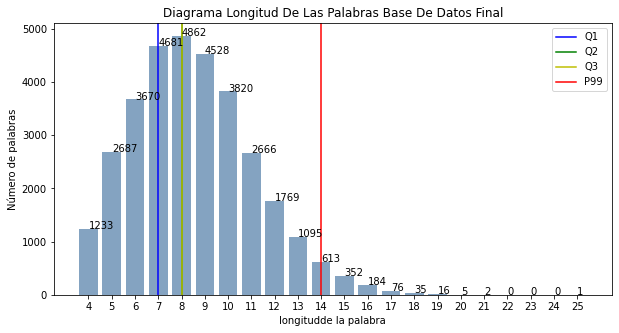

In [410]:
words_final_long=len_words(words_final_list,20)
print(words_final_long[1])
xaxis= [str(i) for i in range(26)]
stadistics = calculate_stadistics(words_final_long[2])
bars_diagram(words_final_long[0][4:],xaxis[4:],'Diagrama Longitud De Las Palabras Base De Datos Final',
             'longitudde la palabra','Número de palabras',stadistics,4)

In [427]:
alphabet = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 
            'n','ñ', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

def posittion_dict(letters_list,words_list):
    dicts = {}
    for letter in letters_list:
        for word in words_list:
            for letter1 in word:
                if letter == letter1:
                    if letter not in dicts:
                        dicts[letter] = []
                    dicts[letter].append(word.index(letter1)+1)
    return dicts


4633


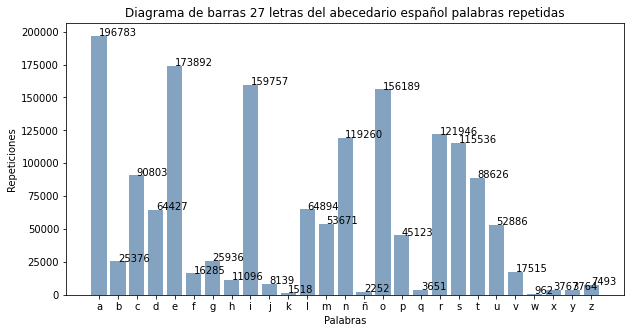

1631547


In [430]:
position_letters_dict = posittion_dict(alphabet,words_filter_list)
letter_list = [i for i in position_letters_dict]
list_letter_repetitions=[]
for j in position_letters_dict:
    list_letter_repetitions.append(len(position_letters_dict[j]))
bars_diagram(list_letter_repetitions,letter_list,'Diagrama de barras {} letras del abecedario español palabras repetidas'.format(len(alphabet)),
             'Palabras','Repeticiones')
print(sum(list_letter_repetitions))

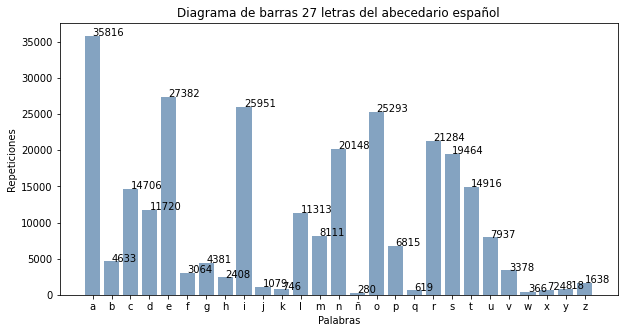

274990


In [431]:
position_letters_dict = posittion_dict(alphabet,words_final_list)
letter_list = [i for i in position_letters_dict]
list_letter_repetitions=[]
for j in position_letters_dict:
    list_letter_repetitions.append(len(position_letters_dict[j]))
bars_diagram(list_letter_repetitions,letter_list,'Diagrama de barras {} letras del abecedario español'.format(len(alphabet)),
             'Palabras','Repeticiones')
print(sum(list_letter_repetitions))

# Letter Analysis

In [443]:
print(len(position_letters_dict['a']))
letter_list = [i for i in position_letters_dict]
list_letter_repetitions=[]
for j in position_letters_dict:
    list_letter_repetitions.append(len(position_letters_dict[j]))

35816


In [490]:
def list_dict_data(parameter,dictionary):
    b= (max(dictionary[parameter]))
    list_dict=(dictionary[parameter])
    position_sum=[0 for i in range(b+1)]
    for j in list_dict:
        position_sum[j] += 1
    del position_sum[0]
    Q1 = np.percentile(dictionary[parameter], 25)
    Q2 = np.percentile(dictionary[parameter], 50)
    Q3 = np.percentile(dictionary[parameter], 75)
    P99 = np.percentile(dictionary[parameter], 99)
    median = np.median(dictionary[parameter])
    mode = st.mode(dictionary[parameter])
    mean = np.mean(dictionary[parameter])
    variance = np.var(dictionary[parameter])
    desviation = np.std(dictionary[parameter])
    return [position_sum,Q1,Q2,Q3,median,mode,mean,P99,parameter,variance,desviation]

positions= list_dict_data('z',position_letters_dict)

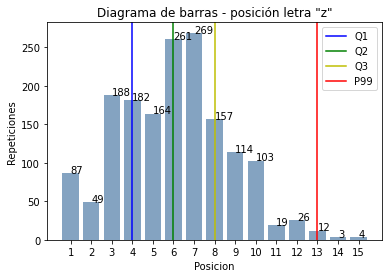

La mediana de la posición es: 6.0
La moda de la posición es: 7
La media de la posición es: 6.0054945054945055
La varianza de la posición es: 7.099481409920971
La desviación de la posición es: 2.664485205423549


In [491]:
# create a dataset
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
height = positions[0]
bars = [i+1 for i in range(len(positions[0]))]
x_pos = np.arange(len(bars))
# Create bars
plt.bar(x_pos, height, color=(0.2, 0.4, 0.6, 0.6))

# Create names on the x-axis
plt.xticks(x_pos, bars)
plt.axvline(positions[1]-1,color = 'b',label = 'Q1')
plt.axvline(positions[2]-1,color = 'g',label = 'Q2')
plt.axvline(positions[3]-1,color = 'y',label = 'Q3')
plt.axvline(positions[7]-1,color = 'r',label = 'P99')
# Show graph
plt.title('Diagrama de barras - posición letra "{}"'.format(positions[8]))
plt.xlabel('Posicion')
plt.ylabel('Repeticiones')
plt.legend()
addlabels( x_pos,height)
plt.show()

print('La mediana de la posición es: {}'.format(positions[4]))
print('La moda de la posición es: {}'.format(positions[5]))
print('La media de la posición es: {}'.format(positions[6]))
print('La varianza de la posición es: {}'.format(positions[9]))
print('La desviación de la posición es: {}'.format(positions[10]))

C:\Users\James Bedoya\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


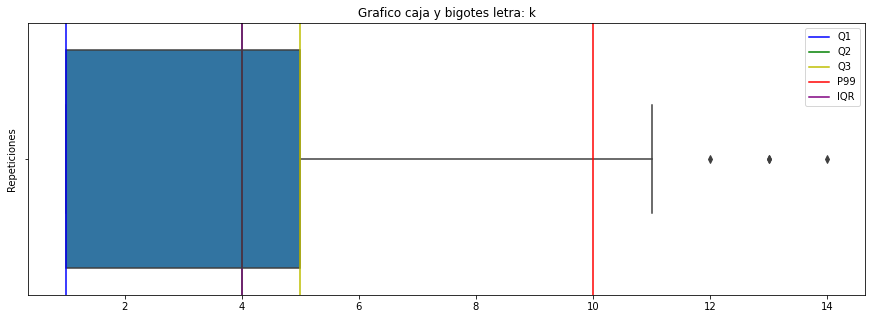

In [480]:
import seaborn as sns
plt.figure(figsize = (15,5))
plt.title('Grafico caja y bigotes letra: {}'.format(positions[8]))
sns.boxplot(position_letters_dict[positions[8]])
plt.axvline(positions[1],color = 'b',label = 'Q1')
plt.axvline(positions[2],color = 'g',label = 'Q2')
plt.axvline(positions[3],color = 'y',label = 'Q3')
plt.axvline(positions[7],color = 'r',label = 'P99')
plt.axvline((positions[3]-positions[1]),color = 'purple',label = 'IQR')
plt.ylabel('Repeticiones')
plt.legend()
plt.show()
print('')